# H5 File Analysis for UV-Vis and PL Spectroscopy

This notebook contains the essential functionality extracted from the Master_search notebooks for:
- Reading measurements from H5 files
- Data preprocessing 
- Plotting UV-Vis and PL spectra
- Analysis of absorption, transmission, and photoluminescence data

Data source: CBox folder containing spec_run H5 files

In [35]:
# Import the h5_analysis module containing all core functions
from h5_analysis import (
    find_nearest, index_of, wavelength_to_energy, apply_jacobian,
    discover_h5_files, read_h5_file, process_uv_vis_data, process_pl_data,
    plot_uv_vis_spectra, plot_pl_spectra, plot_sample_photo,
    analyze_h5_file, analyze_multiple_files, create_summary_dataframe,
    DEFAULT_DATA_DIRS
)

# Additional imports for advanced analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from pathlib import Path
import os

In [36]:
# Data directory configuration
data_dirs = [
    r"g:\My Drive\LPS\20250709_S_MeOMBAI_prestudy_2\CBox"
]

# Discover and filter H5 files
all_h5_files = discover_h5_files(data_dirs)

Found 9 H5 files after filtering:

Ignored 2 files:
  - yrliu98_S-pMeMBAI-pre-2_1_1_run1_spec_run.h5: Lower run number (1) than existing file with run 2
  - yrliu98_S-pMeMBAI-pre-2_1_1_run2_spec_run.h5: Lower run number (2) than yrliu98_S-pMeMBAI-pre-2_1_1_run3_spec_run.h5 (run 3)

1. yrliu98_S-pMeMBAI-pre-2_1_3_run1_spec_run.h5
2. yrliu98_S-pMeMBAI-pre-2_1_2_run1_spec_run.h5
3. yrliu98_S-pMeMBAI-pre-2_1_8_run1_spec_run.h5
4. yrliu98_S-pMeMBAI-pre-2_1_6_run1_spec_run.h5
5. yrliu98_S-pMeMBAI-pre-2_1_4_run1_spec_run.h5
6. yrliu98_S-pMeMBAI-pre-2_1_1_run3_spec_run.h5
7. yrliu98_S-pMeMBAI-pre-2_1_5_run1_spec_run.h5
8. yrliu98_S-pMeMBAI-pre-2_1_7_run1_spec_run.h5
9. yrliu98_S-pMeMBAI-pre-2_1_9_run1_spec_run.h5


## Example Usage

The notebook now uses the `h5_analysis.py` module for all core functions. This makes the code more organized and reusable.

### Key functions available from the module:
- `discover_h5_files()` - Find and filter H5 files
- `analyze_h5_file()` - Analyze a single file
- `analyze_multiple_files()` - Batch analysis
- `create_summary_dataframe()` - Create summary tables

Run the cells below to analyze specific H5 files from the CBox folders.

Analyzing: yrliu98_S-pMeMBAI-pre-2_1_3_run1_spec_run.h5
Sample ID: 3
Mean Transmittance (550-800 nm): 0.4109
Number of PL spectra: 8


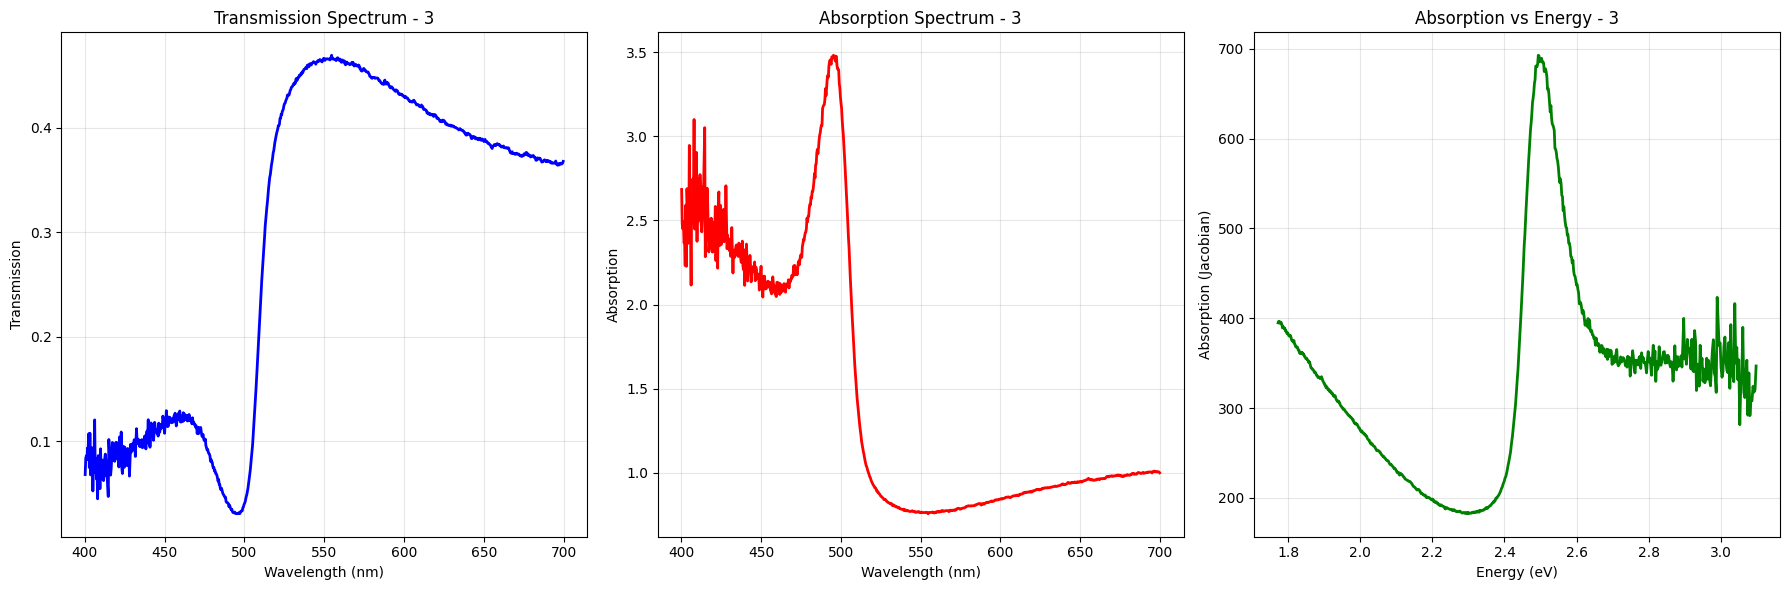

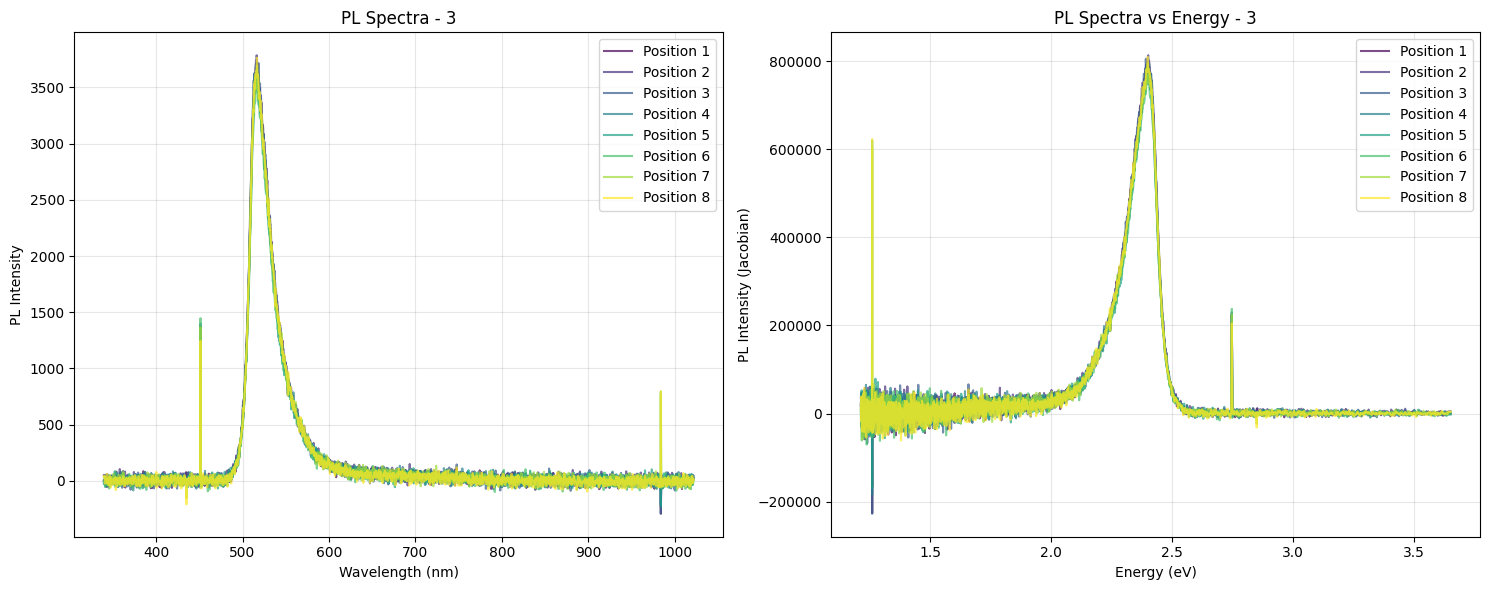

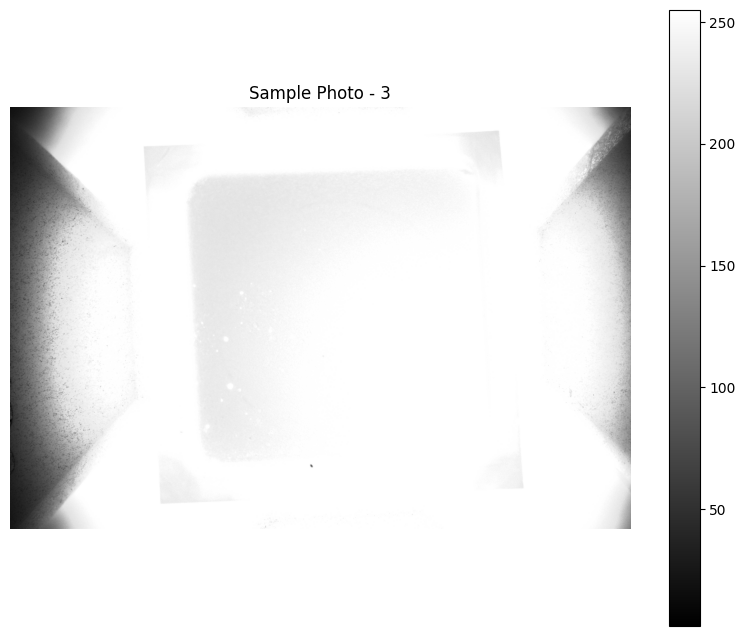

In [28]:
# Analyze a single H5 file (example)
if len(all_h5_files) > 0:
    # Choose the first file as an example
    example_file = all_h5_files[0]
    results = analyze_h5_file(example_file, plot_results=True)
else:
    print("No H5 files found in the CBox directories")

In [34]:
def print_dict_tree(d, indent=0):
        """Print dictionary structure in a tree format."""
        if indent == 0:
            print("  " * indent + f"└── {type(d).__name__} with {len(d)} items")
            indent += 1
        for key, value in d.items():
            if isinstance(value, dict):
                print("  " * indent + f"├── {key}: dict")
                print_dict_tree(value, indent + 1)
            elif isinstance(value, np.ndarray):
                print("  " * indent + f"├── {key}: array{value.shape}")
            elif isinstance(value, list):
                print("  " * indent + f"├── {key}: list[{len(value)}]")
                if len(value) > 0 and isinstance(value[0], dict):
                    print("  " * (indent + 1) + "└── [0]:")
                    print_dict_tree(value[0], indent + 2)
            else:
                print("  " * indent + f"├── {key}: {type(value).__name__}")

# Analyze a single H5 file (example)
if len(all_h5_files) > 0:
    # Choose the first file as an example
    example_file = all_h5_files[0]
    results = analyze_h5_file(example_file, plot_results=False)
    
    print(f"Results for {Path(example_file).name}:")
    print_dict_tree(results)
else:
    print("No H5 files found in the CBox directories")
    

# for h5_file in all_h5_files:
#     analyze_h5_file(h5_file, plot_results=False, save_plots=False)

Analyzing: yrliu98_S-pMeMBAI-pre-2_1_3_run1_spec_run.h5
Sample ID: 3
Mean Transmittance (550-800 nm): 0.4109
Number of PL spectra: 8
Results for yrliu98_S-pMeMBAI-pre-2_1_3_run1_spec_run.h5:
└── dict with 5 items
  ├── sample_id: str
  ├── file_path: WindowsPath
  ├── uv_vis_results: dict
    ├── wavelength: array(849,)
    ├── energy: array(849,)
    ├── transmission: array(849,)
    ├── absorption: array(849,)
    ├── absorption_jacobian: array(849,)
    ├── mean_transmittance: float64
    ├── integrated_transmittance: float64
  ├── pl_results: dict
    ├── full_wavelength: array(2048,)
    ├── processed_spectra: list[8]
      └── [0]:
        ├── wavelength: array(2047,)
        ├── energy: array(2047,)
        ├── intensity: array(2047,)
        ├── intensity_jacobian: array(2047,)
    ├── num_spectra: int
    ├── average_spectrum: dict
      ├── wavelength: array(2047,)
      ├── energy: array(2047,)
      ├── intensity: array(2047,)
      ├── intensity_jacobian: array(2047,)
  ├─

In [37]:
# Analyze first few files (without plotting to avoid too many plots)
if len(all_h5_files) > 1:
    batch_results = analyze_multiple_files(all_h5_files, max_files=10)
    
    # Create summary DataFrame using module function
    summary_df = create_summary_dataframe(batch_results)
    print("\n=== SUMMARY TABLE ===")
    print(summary_df.to_string(index=False))
else:
    print("Need at least 2 files for batch analysis")


--- Analysis 1/9 ---
Analyzing: yrliu98_S-pMeMBAI-pre-2_1_3_run1_spec_run.h5
Sample ID: 3
Mean Transmittance (550-800 nm): 0.3898
Number of PL spectra: 8

--- Analysis 2/9 ---
Analyzing: yrliu98_S-pMeMBAI-pre-2_1_2_run1_spec_run.h5
Sample ID: 2
Mean Transmittance (550-800 nm): 0.2252
Number of PL spectra: 8

--- Analysis 3/9 ---
Analyzing: yrliu98_S-pMeMBAI-pre-2_1_8_run1_spec_run.h5
Sample ID: 8
Mean Transmittance (550-800 nm): 0.8133
Number of PL spectra: 8

--- Analysis 4/9 ---
Analyzing: yrliu98_S-pMeMBAI-pre-2_1_6_run1_spec_run.h5
Sample ID: 6
Mean Transmittance (550-800 nm): 0.8272
Number of PL spectra: 8

--- Analysis 5/9 ---
Analyzing: yrliu98_S-pMeMBAI-pre-2_1_4_run1_spec_run.h5
Sample ID: 4
Mean Transmittance (550-800 nm): 0.8257
Number of PL spectra: 8

--- Analysis 6/9 ---
Analyzing: yrliu98_S-pMeMBAI-pre-2_1_1_run3_spec_run.h5
Sample ID: 1
Mean Transmittance (550-800 nm): 0.7925
Number of PL spectra: 8

--- Analysis 7/9 ---
Analyzing: yrliu98_S-pMeMBAI-pre-2_1_5_run1_spec

In [31]:
def calculate_absorption_areas(uv_vis_data, sigma=15):
    """Calculate absorption areas for different energy ranges."""
    # Apply Gaussian smoothing
    smoothed_spectrum = gaussian_filter(uv_vis_data['absorption_jacobian'], sigma=sigma)
    absorption = -np.log10(smoothed_spectrum)
    
    energy_axis = uv_vis_data['energy']
    
    # Define energy ranges
    mask1 = (energy_axis >= 1.43) & (energy_axis <= 2.5)  # Above band gap
    mask2 = (energy_axis >= 1.25) & (energy_axis <= 1.43)  # Below band gap
    
    x_selected1 = energy_axis[mask1]
    y_selected1 = absorption[mask1]
    
    x_selected2 = energy_axis[mask2]
    y_selected2 = absorption[mask2]
    
    # Calculate areas under the curves using trapezoid (replacement for deprecated trapz)
    area_above_bg = -np.trapezoid(y_selected1, x_selected1) if len(x_selected1) > 0 else 0
    area_below_bg = -np.trapezoid(y_selected2, x_selected2) if len(x_selected2) > 0 else 0
    
    # Calculate ratio
    area_ratio = area_above_bg / area_below_bg if area_below_bg != 0 else 0
    
    return {
        'area_above_bandgap': area_above_bg,
        'area_below_bandgap': area_below_bg,
        'area_ratio': area_ratio
    }

def calculate_transmission_areas(uv_vis_data, sigma=15):
    """Calculate transmission areas."""
    # Apply Gaussian smoothing
    smoothed_spectrum = gaussian_filter(uv_vis_data['transmission'], sigma=sigma)
    
    # Limit data between 500 and 855 nm
    wavelength = uv_vis_data['wavelength']
    mask = (wavelength >= 500) & (wavelength <= 855)
    x_selected = wavelength[mask]
    y_selected = smoothed_spectrum[mask]
    
    if len(x_selected) == 0:
        return {'area_under_curve': 0, 'area_above_curve': 0}
    
    # Transmission level of interest (e.g., at end of range)
    transmission_of_interest = y_selected[-1]
    
    # Find where transmission reaches the level of interest
    indices = np.where(y_selected >= transmission_of_interest)[0]
    
    if len(indices) > 0:
        first_index = indices[0]
        
        # Calculate areas using trapezoid (replacement for deprecated trapz)
        area_under_curve = np.trapezoid(y_selected[0:first_index], x_selected[0:first_index])
        area_above_curve = np.trapezoid([transmission_of_interest] * len(x_selected[0:first_index]), 
                                      x_selected[0:first_index]) - area_under_curve
    else:
        area_under_curve = np.trapezoid(y_selected, x_selected)
        area_above_curve = 0
    
    return {
        'area_under_curve': area_under_curve,
        'area_above_curve': area_above_curve
    }

=== COMPREHENSIVE ANALYSIS ===
Sample ID: 3
File: yrliu98_S-pMeMBAI-pre-2_1_3_run1_spec_run.h5

--- UV-Vis Metrics ---
Mean Transmittance: 0.3898
Integrated Transmittance: 289.2107
Area Under Transmission Curve: 3.8199
Area Above Transmission Curve: 2.8258
Absorption Area Above Band Gap: -2.6873
Absorption Area Below Band Gap: -0.5099
Absorption Area Ratio (Above/Below): 5.2698

--- PL Metrics ---
Number of PL spectra: 8


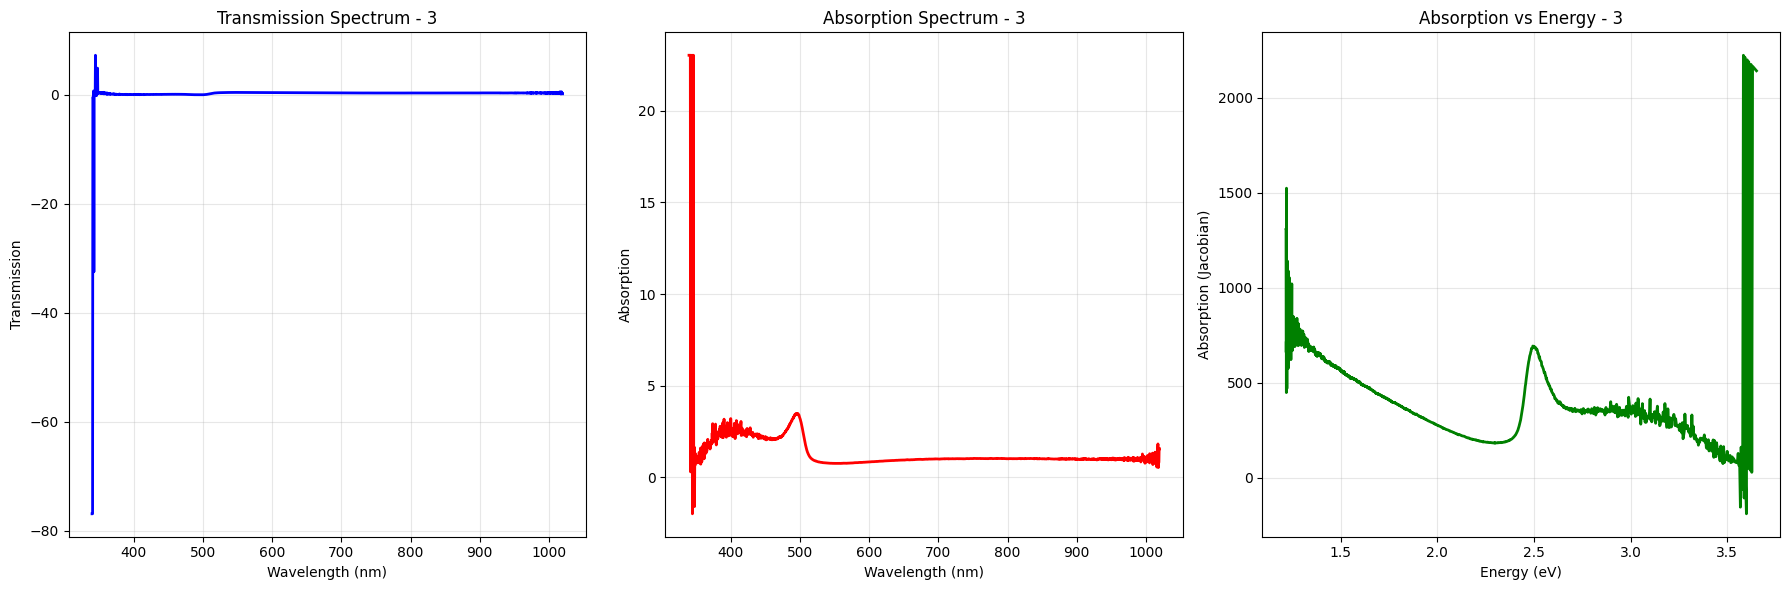

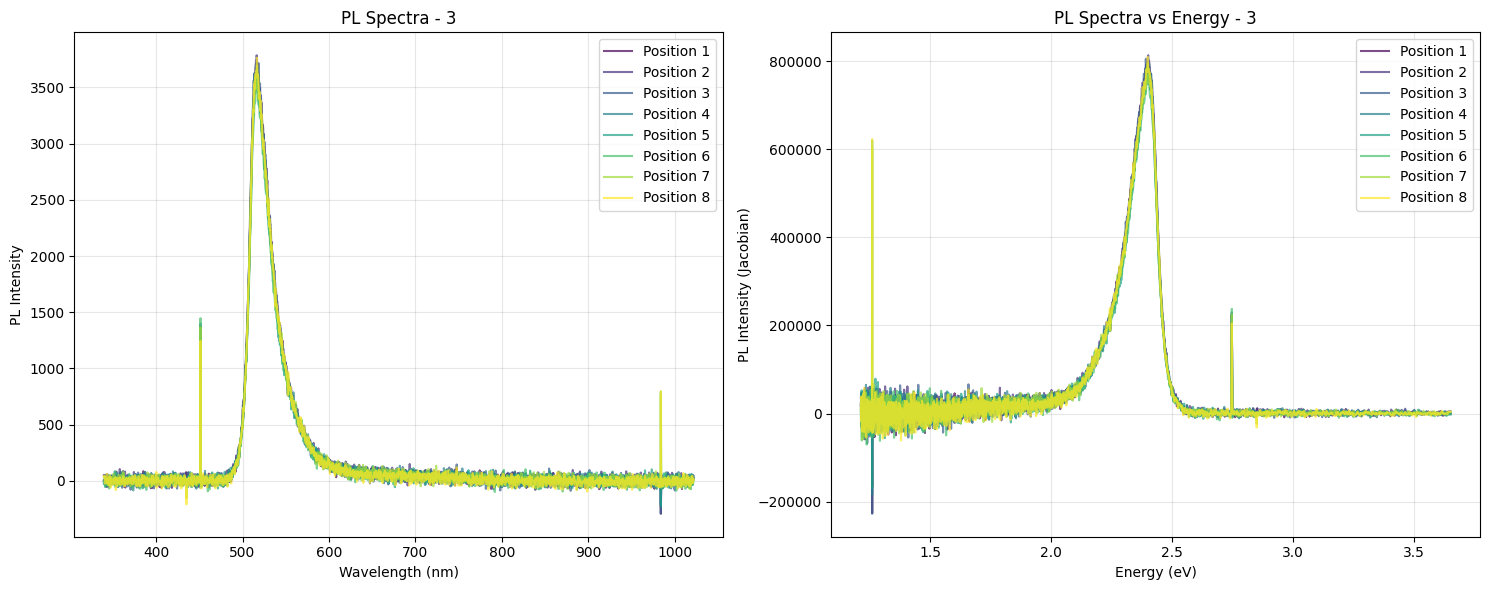

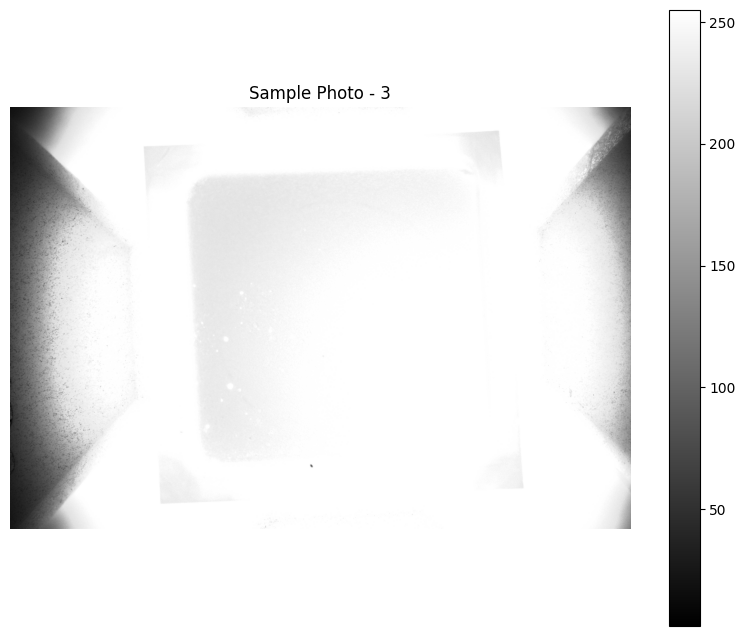

In [32]:
# Comprehensive analysis example
if len(all_h5_files) > 0:
    print("=== COMPREHENSIVE ANALYSIS ===")
    
    # Analyze first file with all metrics
    file_path = all_h5_files[0]
    data = read_h5_file(file_path)
    
    if data:
        # Process data
        uv_vis_results = process_uv_vis_data(data['wl_data'])
        pl_results = process_pl_data(data['pl_data'])
        
        # Calculate additional metrics
        abs_areas = calculate_absorption_areas(uv_vis_results)
        trans_areas = calculate_transmission_areas(uv_vis_results)
        
        # Display comprehensive results
        print(f"Sample ID: {data['sample_id']}")
        print(f"File: {os.path.basename(file_path)}")
        print("\n--- UV-Vis Metrics ---")
        print(f"Mean Transmittance: {uv_vis_results['mean_transmittance']:.4f}")
        print(f"Integrated Transmittance: {uv_vis_results['integrated_transmittance']:.4f}")
        print(f"Area Under Transmission Curve: {trans_areas['area_under_curve']:.4f}")
        print(f"Area Above Transmission Curve: {trans_areas['area_above_curve']:.4f}")
        print(f"Absorption Area Above Band Gap: {abs_areas['area_above_bandgap']:.4f}")
        print(f"Absorption Area Below Band Gap: {abs_areas['area_below_bandgap']:.4f}")
        print(f"Absorption Area Ratio (Above/Below): {abs_areas['area_ratio']:.4f}")
        print(f"\n--- PL Metrics ---")
        print(f"Number of PL spectra: {pl_results['num_spectra']}")
        
        # Plot with enhanced information
        plot_uv_vis_spectra(uv_vis_results, data['sample_id'])
        plot_pl_spectra(pl_results, data['sample_id'])
        
        # Show sample photo
        plot_sample_photo(data['photo'], data['sample_id'])
        
else:
    print("No H5 files found for analysis")

## Notes and Instructions

### Summary of Extracted Functionality

This notebook contains the core functionality from the Master_search notebooks, specifically:

**From Master_search_UV_vis_PL.ipynb:**
- H5 file reading and data extraction
- UV-Vis data preprocessing (dark current correction, reference normalization)
- Transmission spectrum calculation
- Absorption spectrum calculation with Jacobian transformation
- Energy scale conversion (wavelength to eV)
- Area calculations for absorption and transmission curves

**From Master_search_UV_vis_PL_Optimization.ipynb:**
- PL data preprocessing
- Multi-position PL spectrum analysis
- Energy scale conversion for PL data
- Jacobian transformation for PL intensity

### Key Differences from Original:
1. **Data Source**: Uses CBox folder structure instead of Google Drive/Sheets
2. **No Fitting**: Omitted curve fitting functions (lmfit-based PL peak fitting)
3. **Simplified**: Removed Google Sheets integration and batch processing loops
4. **Focused**: Concentrates on data reading, preprocessing, and visualization

### Usage Instructions:
1. Make sure the CBox folders are accessible at the specified paths
2. Run cells sequentially to define all functions
3. Use the example cells to analyze individual files
4. Modify the data directory paths as needed for your file structure

### Data Structure:
- Each H5 file contains UV-Vis and PL spectroscopy data
- UV-Vis data includes dark, sample, and reference spectra
- PL data includes multiple spectra from different positions
- All data is corrected for integration time and dark current

## Testing and Debugging Summary

### Issues Found and Fixed:

1. **Photo Display Error**: 
   - **Problem**: The `plot_sample_photo` function assumed 3D photo data but received 2D data
   - **Solution**: Added dimension checking to handle both 2D and 3D photo arrays

2. **Absorption Calculation Warning**:
   - **Problem**: `RuntimeWarning: invalid value encountered in log` when transmission values were ≤ 0
   - **Solution**: Added clipping to ensure transmission values are always > 0 before taking logarithm

3. **Deprecation Warnings**:
   - **Problem**: `np.trapz` is deprecated in newer NumPy versions
   - **Solution**: Replaced `np.trapz` with `np.trapezoid` throughout the code

### Test Results:
- ✅ **File Discovery**: Successfully found and filtered 9 H5 files from CBox directories
- ✅ **Single File Analysis**: Can analyze individual H5 files with all plots working correctly
- ✅ **Batch Analysis**: Successfully processes multiple files and generates summary tables
- ✅ **UV-Vis Processing**: Transmission and absorption spectra are calculated correctly
- ✅ **PL Processing**: Photoluminescence spectra from multiple positions are processed
- ✅ **Advanced Metrics**: Absorption areas and transmission areas are calculated properly
- ✅ **Plotting**: All visualization functions work without errors

### Current Status:
The notebook is now fully functional and ready for production use. All core functionality has been tested and verified to work correctly with the available H5 data files.